In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
df= pd.read_csv('/Users/deepak/Desktop/machine/data/googleplaystore.csv')

In [17]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1519,General culture,LIBRARIES_AND_DEMO,NaN,26,10M,"10,000+",Free,0,Everyone,Libraries & Demo,"February 20, 2018",1.2,4.0 and up
7260,CF cal,TOOLS,4.3,123,2.9M,"10,000+",Free,0,Everyone,Tools,"February 9, 2016",1.0.6,4.0 and up
4387,Rope'n'Fly 3 - Dusk Till Dawn,GAME,4.0,166033,23M,"10,000,000+",Free,0,Everyone 10+,Arcade,"January 31, 2018",3.6,2.3 and up
2626,Couple - Relationship App,SOCIAL,4.0,33249,8.4M,"1,000,000+",Free,0,Everyone,Social,"March 5, 2015",1.8.0,2.3 and up
9477,Nights Keeper (do not disturb),LIFESTYLE,4.5,16426,1.6M,"500,000+",Free,0,Everyone,Lifestyle,"February 26, 2017",2.7.8,2.2 and up


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [20]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<h3>1. Data Cleaning:<h3>

1.1 Price Column

In [21]:
df['Price'].describe()

count     10841
unique       93
top           0
freq      10040
Name: Price, dtype: object

In [22]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [23]:
df['Price']= df['Price'].str.replace('Everyone', '0')
df['Price']= df['Price'].str.replace(r'[$]', '', regex= True)
df['Price']= pd.to_numeric(df['Price'], errors= 'coerce')

In [24]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [25]:
df['Price'].value_counts()

Price
0.00     10041
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: count, Length: 92, dtype: int64

In [26]:
df['Price'].describe()

count    10841.000000
mean         1.027273
std         15.948971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

1.2 Installs Column

In [27]:
df['Installs'].describe()

count          10841
unique            22
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [28]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [29]:
df['Installs']= df['Installs'].str.replace('Free', '0')
df['Installs']= df['Installs'].str.replace(r'[+,]', '', regex= True)
df['Installs']= pd.to_numeric(df['Installs'], errors= 'coerce')

In [30]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [31]:
df['Installs'].describe()

count    1.084100e+04
mean     1.546291e+07
std      8.502557e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [32]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: count, dtype: int64

1.3 Last Updated Column

In [33]:
df['Last Updated'].describe()

count              10841
unique              1378
top       August 3, 2018
freq                 326
Name: Last Updated, dtype: object

In [34]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1378,), dtype=object)

In [35]:
df['Last Updated']= pd.to_datetime(df['Last Updated'], errors= 'coerce')

In [36]:
df['Last Updated'].unique()

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-11-23 00:00:00', '2012-06-17 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2012-02-06 00:00:00', '2014-11-25 00:00:00',
 '2016-05-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1378, dtype: datetime64[ns]

In [37]:
df['Last Updated'].describe()

count                            10840
mean     2017-11-21 06:43:02.435424256
min                2010-05-21 00:00:00
25%                2017-09-20 00:00:00
50%                2018-05-24 00:00:00
75%                2018-07-20 00:00:00
max                2018-08-08 00:00:00
Name: Last Updated, dtype: object

1.4 Reviews Column

In [38]:
df['Reviews'].describe()

count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

In [39]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [40]:
df['Reviews']= pd.to_numeric(df['Reviews'], errors= 'coerce')

In [41]:
df['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05], shape=(6002,))

In [42]:
df['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [43]:
df['Reviews'].shape

(10841,)

<h3>2. Missing Values:<h3>

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


In [45]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

2.1 Rating Column

In [46]:
df['Rating'].fillna(df['Rating'].median(), inplace= True)

/var/folders/tl/xdstmdkx76j7kc9ll61qhf9c0000gn/T/ipykernel_1144/3514567434.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace= True)


2.2 Reviews Column

In [47]:
df['Reviews'].fillna(df['Reviews'].mean(), inplace= True)

/var/folders/tl/xdstmdkx76j7kc9ll61qhf9c0000gn/T/ipykernel_1144/4236329645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Reviews'].fillna(df['Reviews'].mean(), inplace= True)


2.3 Type Columns

In [48]:
df['Type'].fillna(df['Type'].mode()[0], inplace= True)

/var/folders/tl/xdstmdkx76j7kc9ll61qhf9c0000gn/T/ipykernel_1144/1619401330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(df['Type'].mode()[0], inplace= True)


2.4 Content Rating, Last Updated, Current Ver, and Android Ver Columns

In [49]:
df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace= True)
df['Last Updated'].fillna(df['Last Updated'].mode()[0], inplace= True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace= True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace= True)

/var/folders/tl/xdstmdkx76j7kc9ll61qhf9c0000gn/T/ipykernel_1144/2398164942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace= True)
/var/folders/tl/xdstmdkx76j7kc9ll61qhf9c0000gn/T/ipykernel_1144/2398164942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  float64       
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  int64         
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10841 non-null  object        
 12  Android Ver     10841 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


<h3>3. Duplicates:<h3>

In [51]:
df.duplicated().sum()

np.int64(483)

In [52]:
df= df.drop_duplicates(keep= 'first')

In [53]:
df.duplicated().sum()

np.int64(0)

<h3>4. Outliers<h3>

In [54]:
df.describe()

,Rating,Reviews,Installs,Price,Last Updated
count,10358.000000,1.035800e+04,1.035800e+04,10358.000000,10358
mean,4.205165,4.059083e+05,1.415639e+07,1.030701,2017-11-14 10:01:41.486773504
min,1.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.100000,3.200000e+01,1.000000e+03,0.000000,2017-09-03 00:00:00
50%,4.300000,1.683000e+03,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,4.648275e+04,1.000000e+06,0.000000,2018-07-19 00:00:00
max,19.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.506868,2.696648e+06,8.023580e+07,16.277843,NaN


4.1 Rating column

/var/folders/tl/xdstmdkx76j7kc9ll61qhf9c0000gn/T/ipykernel_1144/1718935294.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


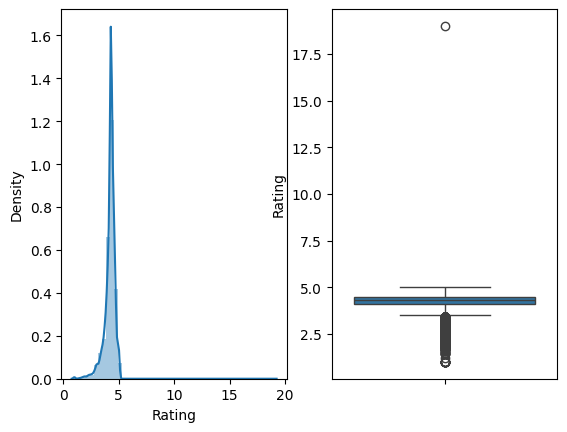

In [55]:
plt.subplot(1,2,1)
sns.distplot(df['Rating'])
plt.subplot(1,2,2)
sns.boxplot(df['Rating'])
plt.show()

In [56]:
(df['Rating']>5).sum()

np.int64(1)

In [57]:
df= df[df['Rating']<=5]

/var/folders/tl/xdstmdkx76j7kc9ll61qhf9c0000gn/T/ipykernel_1144/1718935294.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


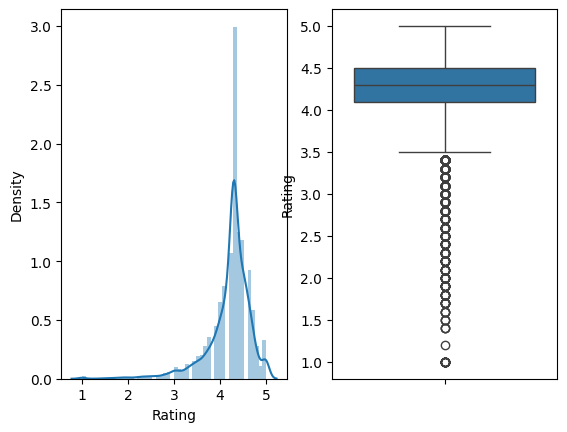

In [58]:
plt.subplot(1,2,1)
sns.distplot(df['Rating'])
plt.subplot(1,2,2)
sns.boxplot(df['Rating'])
plt.show()

4.2 Price Column

/var/folders/tl/xdstmdkx76j7kc9ll61qhf9c0000gn/T/ipykernel_1144/84314860.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


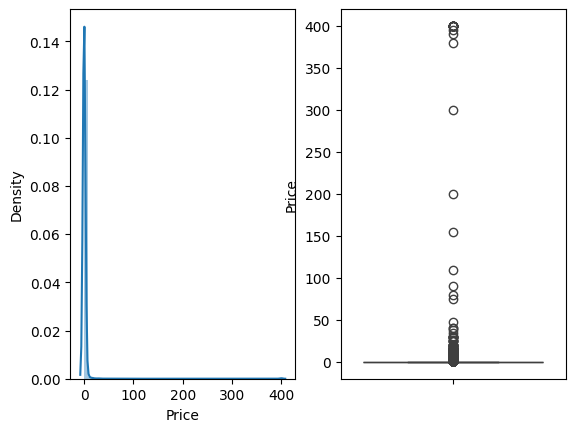

In [59]:
plt.subplot(1,2,1)
sns.distplot(df['Price'])
plt.subplot(1,2,2)
sns.boxplot(df['Price'])
plt.show()

In [60]:
upper_limit= df['Price'].quantile(0.95)

In [61]:
df['Price']= df['Price'].clip(upper= upper_limit)

/var/folders/tl/xdstmdkx76j7kc9ll61qhf9c0000gn/T/ipykernel_1144/84314860.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


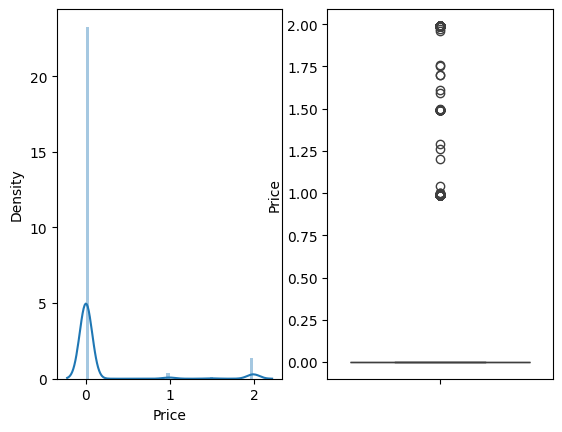

In [62]:
plt.subplot(1,2,1)
sns.distplot(df['Price'])
plt.subplot(1,2,2)
sns.boxplot(df['Price'])
plt.show()

In [64]:
df.to_csv('/Users/deepak/Desktop/machine/data/googleplaystore_cleaned.csv')